In [49]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [50]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [51]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [52]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [53]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[26.4887905  26.49524591 26.50170132 26.50815674 26.51461215 26.52106756
 26.52752297 26.53397839 26.5404338  26.54688921 26.55334462 26.55980003
 26.56625545 26.57271086 26.57916627 26.58562168 26.5920771  26.59853251
 26.60498792 26.61144333 26.61789874 26.62435416 26.63080957 26.63726498
 26.64372039 26.6501758  26.65663122 26.66308663 26.66954204 26.67599745]


In [54]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 19.351397352696086
Testing MAPE: 340.3937657487028
Testing MAE: 19.269719246908284


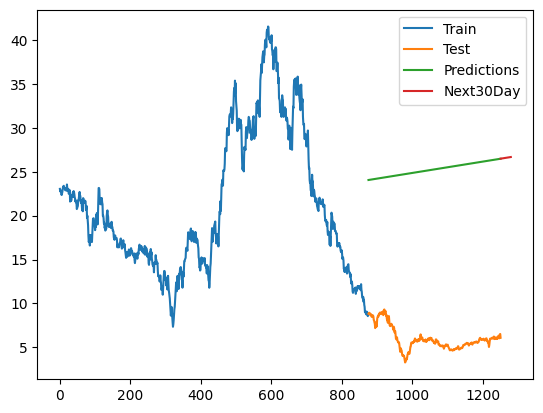

In [55]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [56]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[26.4887905  26.49524591 26.50170132 26.50815674 26.51461215 26.52106756
 26.52752297 26.53397839 26.5404338  26.54688921 26.55334462 26.55980003
 26.56625545 26.57271086 26.57916627 26.58562168 26.5920771  26.59853251
 26.60498792 26.61144333 26.61789874 26.62435416 26.63080957 26.63726498
 26.64372039 26.6501758  26.65663122 26.66308663 26.66954204 26.67599745
 26.68245287 26.68890828 26.69536369 26.7018191  26.70827451 26.71472993
 26.72118534 26.72764075 26.73409616 26.74055157 26.74700699 26.7534624
 26.75991781 26.76637322 26.77282864 26.77928405 26.78573946 26.79219487
 26.79865028 26.8051057  26.81156111 26.81801652 26.82447193 26.83092734
 26.83738276 26.84383817 26.85029358 26.85674899 26.86320441 26.86965982]


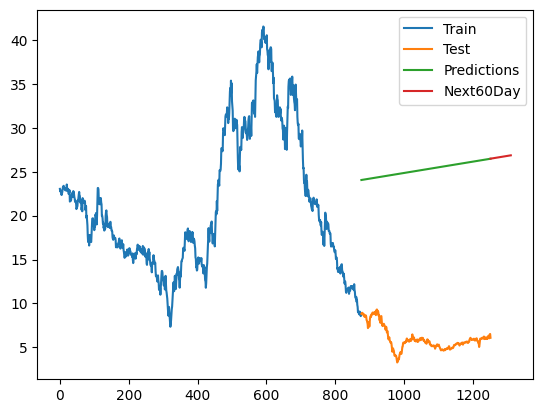

In [57]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [58]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[26.4887905  26.49524591 26.50170132 26.50815674 26.51461215 26.52106756
 26.52752297 26.53397839 26.5404338  26.54688921 26.55334462 26.55980003
 26.56625545 26.57271086 26.57916627 26.58562168 26.5920771  26.59853251
 26.60498792 26.61144333 26.61789874 26.62435416 26.63080957 26.63726498
 26.64372039 26.6501758  26.65663122 26.66308663 26.66954204 26.67599745
 26.68245287 26.68890828 26.69536369 26.7018191  26.70827451 26.71472993
 26.72118534 26.72764075 26.73409616 26.74055157 26.74700699 26.7534624
 26.75991781 26.76637322 26.77282864 26.77928405 26.78573946 26.79219487
 26.79865028 26.8051057  26.81156111 26.81801652 26.82447193 26.83092734
 26.83738276 26.84383817 26.85029358 26.85674899 26.86320441 26.86965982
 26.87611523 26.88257064 26.88902605 26.89548147 26.90193688 26.90839229
 26.9148477  26.92130311 26.92775853 26.93421394 26.94066935 26.94712476
 26.95358018 26.96003559 26.966491   26.97294641 26.97940182 26.98585724
 26.9

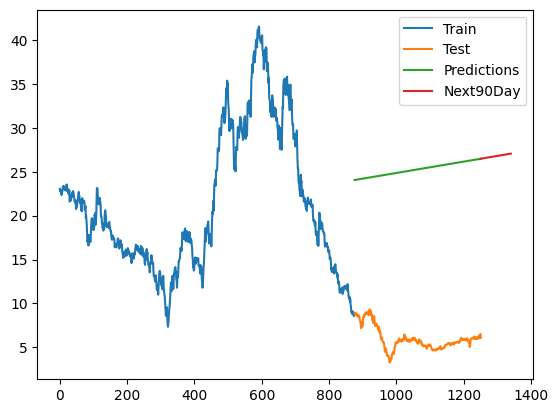

In [59]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()